In [106]:


import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
from sklearn.model_selection import train_test_split
import os
import imageio
import cv2
import glob2
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


In [107]:
import glob

In [108]:
%pwd
#'C:\\Users\\Thomas\\Malaria Project'

'C:\\Users\\Thomas\\Malaria Project'

In [109]:
example_image = imageio.imread('example.png')

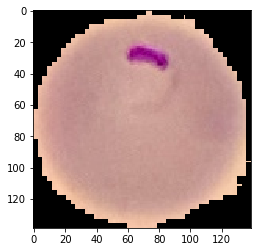

In [110]:
plt.imshow(example_image)

In [111]:
parasitized_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\')
#Importing the data for the parasitized cells

uninfected_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Uninfected')
#importing uninfected cell image data


In [112]:
print(len(parasitized_cells))
print(len(uninfected_cells))
#confirming all the data was put in 

13780
13780


In [113]:
data = []
labels = []

for img in parasitized_cells:
    try:
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        print("Error with Parasitized cell")
        
for img in uninfected_cells:
    try: 
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Uninfected\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        print("Error with uninfected cell")


Error with Parasitized cell
Error with uninfected cell


### Journaling an error
Doing a basic for loop above for some reason creates an error:
"OSError: cannot identify image file 'C:\\Users\\Thomas\\Malaria Project\\Parasitized\\Thumbs.db'"

I tried searching for Thumbs.db but I could not find it so probalby some kind of hidden file and that is what required a try/except loop instead of a simple for loop.  This was not a problem I had anticipated. 

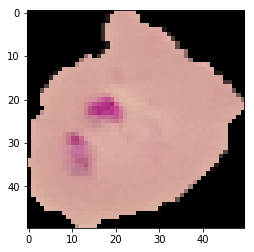

In [114]:
#Checking to see if the images were imported
plt.imshow(data[3])
plt.show()

In [115]:
image_data = np.array(data)
labels = np.array(labels)

In [116]:
#image_data

In [117]:
#image_data[13778]

In [118]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [119]:
import collections

labels
collections.Counter(labels)

Counter({0: 13779, 1: 13779})

In [120]:
#Train test split time
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = .2, random_state = 42)

In [121]:
import collections

collections.Counter(y_test)


Counter({1: 2750, 0: 2762})

I broke the code somehow.  There are supposed to be roughly equal 0 and 1 cells and yet all of the cells in the test set are 1 as of 10/29/19.   I don't know why. 

Edit:  10/20/19    Figured out the issue.   I had a typo where i forgot to change the folder name from parasitized to uninfected.   Still not sure why it only imported everything once instead of doubling up everything.  Another question for another time. 

In [122]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test  = np_utils.to_categorical(y_test, num_classes = 2)

In [123]:
print(f"Shape of training image data : {x_train.shape}")
print(f"Shape of testing image data : {x_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training image data : (22046, 50, 50, 3)
Shape of testing image data : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels: (5512, 2)


In [124]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers



In [125]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'sigmoid', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'sigmoid'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'sigmoid'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'sigmoid'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

Taking a lot from https://www.kaggle.com/harshel7/detecting-malaria-val-accuracy-97



In [126]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, 
                channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 11, 11, 32)        128       
__________

In [127]:
import keras_metrics

In [128]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)

In [129]:
#Trying out some GPU stuff
from tensorflow.python.client import device_lib

In [130]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13857904970225628814
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2214907084
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13284410076067983556
physical_device_desc: "device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:06:00.0, compute capability: 6.1"
]


In [131]:
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [132]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [133]:
first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 10s 449us/step - loss: 0.6215 - acc: 0.7292 - f1_m: 0.7292 - precision_m: 0.7292 - recall_m: 0.72924s - loss: 0.7183 - acc: 0.69
Epoch 2/20
22046/22046 [==============================] - 8s 348us/step - loss: 0.3518 - acc: 0.8489 - f1_m: 0.8489 - precision_m: 0.8489 - recall_m: 0.8489
Epoch 3/20
22046/22046 [==============================] - 8s 342us/step - loss: 0.2349 - acc: 0.9105 - f1_m: 0.9105 - precision_m: 0.9105 - recall_m: 0.9105
Epoch 4/20
22046/22046 [==============================] - 8s 348us/step - loss: 0.1975 - acc: 0.9279 - f1_m: 0.9279 - precision_m: 0.9279 - recall_m: 0.9279
Epoch 5/20
22046/22046 [==============================] - 8s 362us/step - loss: 0.1810 - acc: 0.9362 - f1_m: 0.9362 - precision_m: 0.9362 - recall_m: 0.9362
Epoch 6/20
22046/22046 [==============================] - 8s 349us/step - loss: 0.1719 - acc: 0.9418 - f1_m: 0.9418 - precision_m: 0.9418 - recall_m: 0.9418
Epoch 7/20
22046/22046 [====

In [134]:
 loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, verbose=0)

In [135]:
print(loss, accuracy, f1_score, precision, recall)

0.4397368552582271 0.9163642960812772 0.9163642395909535 0.9163642960812772 0.9163642960812772


In [136]:
#compiling the model 
#compile the model
#model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
#              metrics = [keras_metrics.precision(), keras_metrics.recall()])

I don't know what this error means or how to help:

W1030 00:03:39.072808 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

I have no idea how to fix this or even if I need to fix it

In [137]:
#first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

### Mentor question
These epochs are taking a very long time.  Some of them from 328 seconds down to about 150 when the example I saw took only about 9 seconds per epoch. Why is my notebook taking so much longer then his?  My computer is fairly powerful and can run all the new video games so something is wrong here and I need to figure out what. 

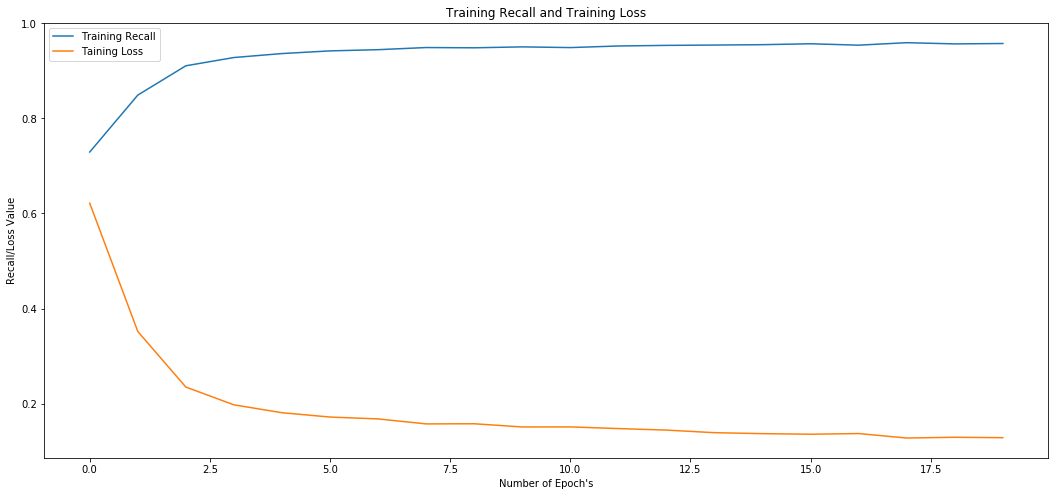

In [138]:
plt.figure(figsize = (18,8))
plt.plot(range(20), first_model.history['acc'], label = 'Training Recall')
plt.plot(range(20), first_model.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Recall/Loss Value')
plt.title('Training Recall and Training Loss')
plt.legend(loc = "best")
#graphing how the accuracy and loss change over the epochs

In [139]:
predictions = model.evaluate(x_test, y_test)


5512/5512 [==============================] - 1s 135us/step


In [140]:
from keras.models import load_model

In [141]:
#model.save('First_malaria_model')

In [142]:
#Trying to find what is in predictions
print(predictions)

[0.4397368552582271, 0.9163642960812772, 0.9163642395909535, 0.9163642960812772, 0.9163642960812772]


In [143]:


print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')



LOSS : 0.4397368552582271
ACCURACY : 0.9163642960812772


Got a 95.5% accuracy score on the model.  This is without any data augmentation. 

### The above few cells are just setting up smaller sets of data for testing my code.  In my final version these will not be in there and I will just simply jump straight into the code itself.  

Testing my code on about 26000 images sounds very annoying to wait for every time I want to run this thing. 

11-19-19 Mentor meeting
Create confusion matrix for results. 

Think about what is the best accuracy metric. 
Minimize the false negatives as much as possible. Do a confusion matrix. 

Also augment the data and see how it works.  

Try different strategies for the CNN

Try the different ideas and then do some speculation as to why some worked better or worse then others. 

Term I am looking for is "sensitivity" the true positive rate. 
    I have to mention why I believe a specific metric is the most important.  Why I believe sensitivity is the best, mostly because a false negative is the worst thing to happen here. 
Mentor suggests checking for F1 score,   

Mentor also says look up "lift from ground truth" 

Submit Capstone proposal


11-20-19 Work and solutions

I am picking sensitivity as the target for this project.  

I will later attempt to use data augmentation on the images.  This will be very annoying to run on my home PC so I will try to do it on Google drive and also on my home PC  



In [144]:
from keras.preprocessing.image import ImageDataGenerator

In [145]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [146]:
augmented_model = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [147]:

aug_optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
augmented_model.compile(loss = 'categorical_crossentropy', optimizer = aug_optim, metrics = ['acc',f1_m,precision_m, recall_m])

In [148]:
second_model = augmented_model.fit_generator(train_generator,
                                 steps_per_epoch = len(x_train) // 64,
                                epochs = 20)

Epoch 1/20
344/344 [==============================] - 29s 84ms/step - loss: 0.7815 - acc: 0.6114 - f1_m: 0.6114 - precision_m: 0.6114 - recall_m: 0.6114
Epoch 2/20
344/344 [==============================] - 27s 79ms/step - loss: 0.5517 - acc: 0.7365 - f1_m: 0.7365 - precision_m: 0.7365 - recall_m: 0.7365 3s - loss: 0.5595 - acc: 0.7302 - f1_m: 0.730
Epoch 3/20
344/344 [==============================] - 27s 79ms/step - loss: 0.4315 - acc: 0.8178 - f1_m: 0.8178 - precision_m: 0.8178 - recall_m: 0.8178
Epoch 4/20
344/344 [==============================] - 27s 77ms/step - loss: 0.3755 - acc: 0.8472 - f1_m: 0.8472 - precision_m: 0.8472 - recall_m: 0.8472
Epoch 5/20
344/344 [==============================] - 27s 80ms/step - loss: 0.3494 - acc: 0.8609 - f1_m: 0.8609 - precision_m: 0.8609 - recall_m: 0.8609 3s - loss: 0.3468 - acc: 0.8624 - f1_m: 0.8624 - precisio - ETA: 1s - loss: 0.3481 - acc: 0.8611 - f1_m: 0.8611 - precision_m: 0.8611 - recall_m: 0.86 - ETA: 1s - loss: 0.3481 - acc: 0.8609

In [149]:
#augmented_model.save('Augmented_model')

In [150]:
prediction_2 = augmented_model.evaluate_generator(val_generator, steps = 5)

In [151]:


print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.5103353142738343
ACCURACY : 0.66875


## 11-25-19
Slight improvement in accuracy and recall so that's doing what it is supposed to.  I was using evaluate when I should have been using evaluate generator.  Simple mistake that broke everything.  

In [152]:
print(prediction_2)

[0.5103353142738343, 0.66875, 0.6687499403953552, 0.66875, 0.66875]


In [153]:

predict2 = augmented_model.evaluate_generator(val_generator, steps = 5)

In [154]:
print(predict2)

[0.48900398015975954, 0.703125, 0.7031249403953552, 0.703125, 0.703125]


## Sigmoid results

So running a sigmoid on all the networks turns it into garbage. Good to know.  Augmented Recall at .7031, Accuraccy .667.     Non-augmented recall: .916, Accuraccy .916  